In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/spam.csv", encoding="latin-1")

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [18]:
np.sum(df[df.columns[2:].tolist()].notna())

/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Machine-learning/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [19]:
print(df.shape)
df.loc[df["Unnamed: 2"].notna()].iloc[:5]

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [20]:
# few rows, remove
df_no_Nan = df.dropna(axis=1)

df_no_Nan.columns = ["class","content"]
df_no_Nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='class', ylabel='count'>

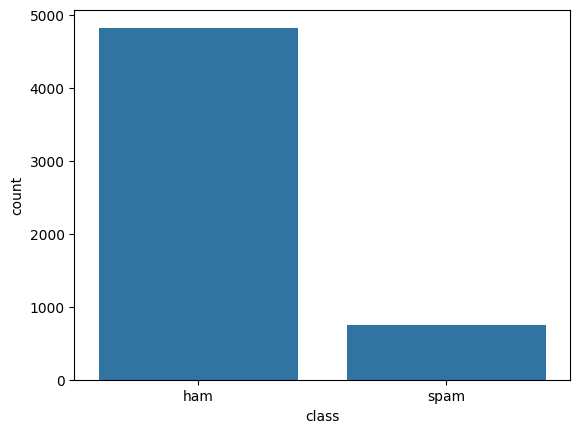

In [21]:
sns.countplot(data=df_no_Nan, x="class")

In [22]:
df = pd.get_dummies(df_no_Nan,columns=["class"], drop_first=True)

X, y = df["content"], df["class_spam"]

X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: content, Length: 5572, dtype: object

In [23]:
# TF-IDF
# term frequency -  tabell av alla ord som förekommer, och hur ofta dem förekommer med en ratio

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(stop_words="english")
X_tfidf = tfidf.fit_transform(X)

print(X_tfidf[3])


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (1, 8404)>
  Coords	Values
  (0, 2738)	0.36002824805111666
  (0, 6450)	0.6518642650180976
  (0, 2757)	0.3908324106090213
  (0, 3815)	0.5410200249669143


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=.33,random_state=42)

X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<Axes: xlabel='class_spam', ylabel='count'>

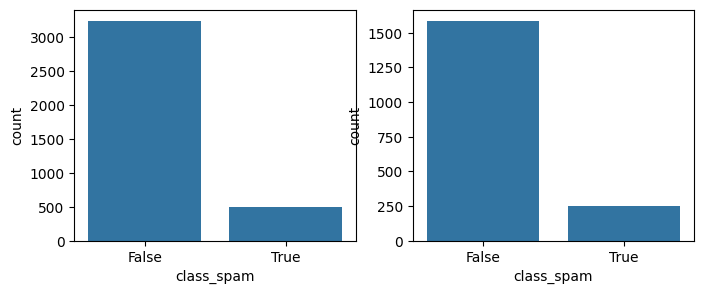

In [25]:
fig, ax = plt.subplots(1,2, dpi=100, figsize=(8,3))

sns.countplot(x=y_train, ax=ax[0])
sns.countplot(x = y_test, ax=ax[1])

# Bayes theorem




multinomial
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      1587
        True       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839

bernoulli
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1587
        True       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839

complement
              precision    recall  f1-score   support

       False       0.99      0.92      0.96      1587
        True       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.

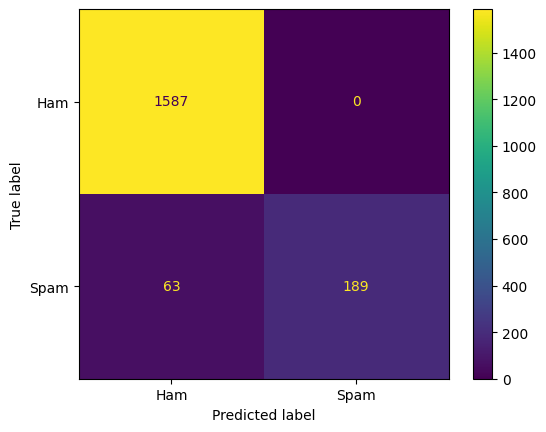

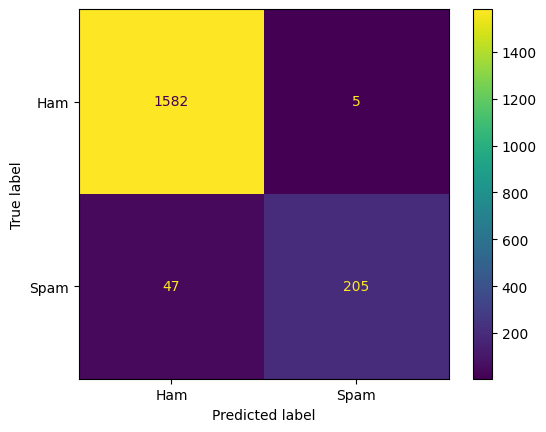

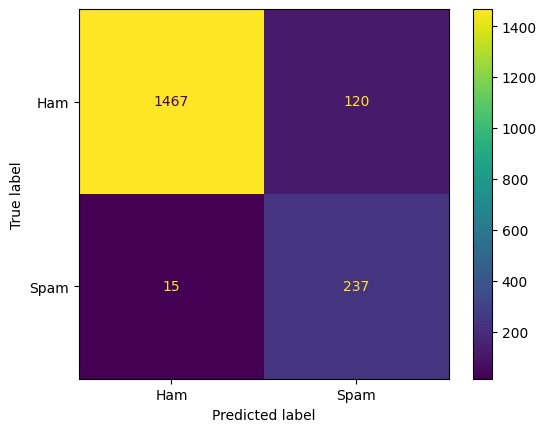

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    Bernoulli = BernoulliNB(),
    complement = ComplementNB()
)

def evalute_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm,display_labels=["Ham","Spam"]).plot()


# precision = TP / (TP+FP)
# Recall = TP / (TP+FN)
print("multinomial")
evalute_model(naive_bayes["multinomial"])
print("bernoulli")
evalute_model(naive_bayes["Bernoulli"])
print("complement")
evalute_model(naive_bayes["complement"])

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1587
        True       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



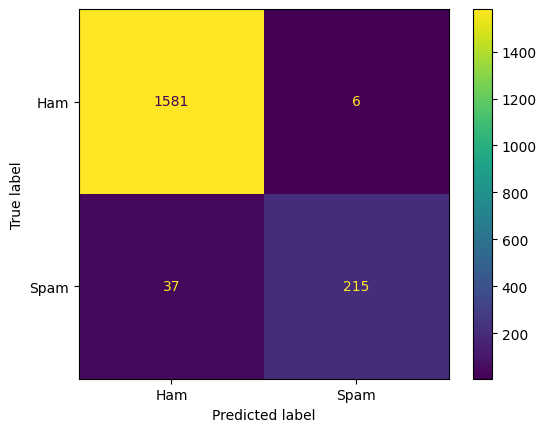

In [31]:
from sklearn.svm import LinearSVC
evalute_model(LinearSVC())


              precision    recall  f1-score   support

       False       0.97      1.00      0.99      1587
        True       1.00      0.84      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



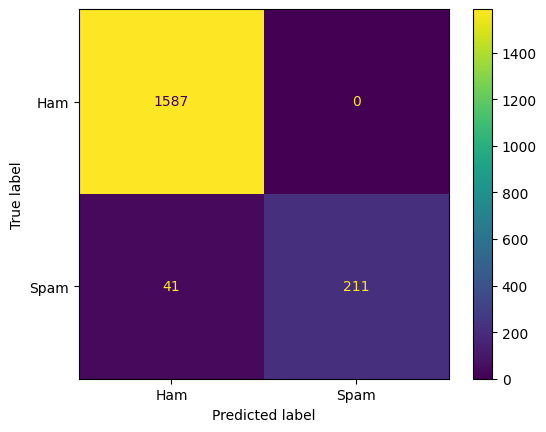

In [32]:
from sklearn.ensemble import RandomForestClassifier

evalute_model(RandomForestClassifier())

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1587
        True       1.00      0.86      0.93       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



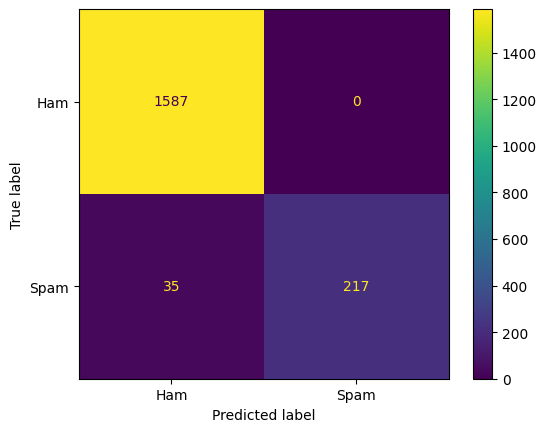

In [37]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(
    [("rf", RandomForestClassifier()),
     ("svc", LinearSVC()),
     ("naive_complement", ComplementNB()),
     ("naive_bernoulli", BernoulliNB()),
     ("naive_multinomial", MultinomialNB())
     ], voting="hard", n_jobs=-1)

evalute_model(vote_clf)

In [ ]:
# deployment

from sklearn.pipeline import Pipeline

pipe = Pipeline([("tfidf",TfidfVectorizer(stop_words="english")), ("vote",vote_clf)])

pipe.fit(X,y)
pipe.predict(["Enter now and win 1000$!!"])

array([ True])